# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/workspaces/Final_Project_DataScient/data/interim/data_limpia.zip')
df = data.copy()
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,_EXTETH3,HHADULT,...,ACEPRISN,ACEDIVRC,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,FIREARM5,GUNLOAD,LOADULK2
0,1.0,1.0,2.0,7.0,13.0,9.0,4.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,2.0,2.0,13.0,3.0,2.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,7.0,8.0,6.0,4.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,2.0,7.0,14.0,9.0,2.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,2.0,5.0,5.0,3.0,3.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445128,1.0,1.0,1.0,1.0,7.0,5.0,4.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445129,1.0,3.0,2.0,8.0,10.0,9.0,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445130,1.0,2.0,2.0,7.0,11.0,5.0,3.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ingenieria de atributos para fusionar columnas con significado acumulativo
**Paso 1:** Analizar la codificacion presente en las columnas susceptibles de fusionar  
**Paso 2:** Imputar valores a los NaN presentes en columnas a sumar (Nan + 1 = NaN, NaN + 0 = Nan...)  
**Paso 3:** Sumar columnas y agregar resultado a nueva columna  
**Paso 4:** Eliminar columnas utilizadas para la crecion de una nueva

Variables _HLTHPLN (Cobertura formal del sistema de salud) y PERSDOC3 (Atención continua o relación con un médico)

Se decide mantener solo _HLTHPLN porque:
- Es más fundamental y objetivo (tener o no cobertura).
- Está menos expuesta a interpretación subjetiva.
- Captura directamente un factor estructural de acceso.

In [3]:
df = df.drop("PERSDOC3", axis=1)

social_vulnerability_score: ``SDHEMPLY``, ``SDHFOOD1``, ``SDHUTILS``, ``SDHBILLS``, ``SDHTRNSP``, ``CAREGIV1``

``SDHEMPLY``: Problemas para encontrar o mantener empleo por razones de salud  
``SDHFOOD1``: Problemas para acceder a comida suficiente  
``SDHUTILS``: Dificultades para pagar agua, luz, gas  
``SDHBILLS``: Dificultad para pagar otras facturas (no básicas)  
``SDHTRNSP``: Problemas con transporte para acceder a atención médica o actividades  
``CAREGIV1``: Si cuida a otra persona (sí/no)  

In [4]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["SDHEMPLY"] > 2, "SDHEMPLY"] = np.nan
df.loc[df["SDHEMPLY"] == 2, "SDHEMPLY"] = 0
df.SDHEMPLY.value_counts()

SDHEMPLY
0.0    227969
1.0     23170
Name: count, dtype: int64

In [5]:
# 1, 2, 3 o 4: Yes, 5: No >> Cambiar a 1: Yes, 0: No
df.loc[df["SDHFOOD1"] > 5, "SDHFOOD1"] = np.nan
df.loc[df["SDHFOOD1"] < 5, "SDHFOOD1"] = 1
df.loc[df["SDHFOOD1"] == 5, "SDHFOOD1"] = 0
df.SDHFOOD1.value_counts()

SDHFOOD1
0.0    203654
1.0     47453
Name: count, dtype: int64

In [6]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["SDHUTILS"] > 2, "SDHUTILS"] = np.nan
df.loc[df["SDHUTILS"] == 2, "SDHUTILS"] = 0
df.SDHUTILS.value_counts()

SDHUTILS
0.0    236141
1.0     14942
Name: count, dtype: int64

In [7]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["SDHBILLS"] > 2, "SDHBILLS"] = np.nan
df.loc[df["SDHBILLS"] == 2, "SDHBILLS"] = 0
df.SDHBILLS.value_counts()

SDHBILLS
0.0    228332
1.0     22690
Name: count, dtype: int64

In [8]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["CAREGIV1"] > 2, "CAREGIV1"] = np.nan
df.loc[df["CAREGIV1"] == 2, "CAREGIV1"] = 0
df.CAREGIV1.value_counts()

CAREGIV1
0.0    78174
1.0    19662
Name: count, dtype: int64

In [9]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["SDHTRNSP"] > 2, "SDHTRNSP"] = np.nan
df.loc[df["SDHTRNSP"] == 2, "SDHTRNSP"] = 0
df.SDHTRNSP.value_counts()

SDHTRNSP
0.0    234506
1.0     16376
Name: count, dtype: int64

In [10]:
social_columns = ["SDHEMPLY", "SDHFOOD1", "SDHUTILS", "SDHBILLS", "SDHTRNSP", "CAREGIV1"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[social_columns] = df[social_columns].fillna(0)

df["social_vulnerability_score"] = df[social_columns].sum(axis=1)
df = df.drop(social_columns, axis=1)

Se unifican valores relativos a condiciones sociales en un score acumulativo, donde mayor valor indica peor condicion social

In [11]:
df.shape

(445132, 76)

Variables EXERANY2 (Realiza alguna actividad física) y _TOTINDA (Actividad física suficiente (recodificada))

Se decide mantener solo _TOTINDA porque:
- Ya está recodificada de forma estandarizada por el BRFSS.
- Refleja si cumple con los mínimos de actividad física recomendados, no solo si ha hecho "algo".
- Más útil para análisis de riesgo real o comparación entre personas.

In [12]:
df = df.drop("EXERANY2", axis=1)

Variables SMOKE100 (¿Ha fumado ≥100 cigarrillos en su vida?),  USENOW3 (¿Fuma actualmente cigarrillos tradicionales?) y _RFSMOK3 (Fumador actual (recodificada))

Se decide mantener solo _RFSMOK3 porque:
- Ya resume todo lo relevante del consumo de tabaco convencional.

In [13]:
df = df.drop(["SMOKE100", "USENOW3"], axis=1)

tobacco_use: ``_RFSMOK3`` y ``ECIGNOW2``

``_RFSMOK3``: Fumador actual  
``ECIGNOW2``: ¿Usa cigarrillos electrónicos actualmente? 

In [14]:
# 1: No, 2: Yes >> Cambiar a 1: Yes, 0: No
df.loc[df["_RFSMOK3"] > 2, "_RFSMOK3"] = np.nan

df.loc[df["_RFSMOK3"] == 1, "_RFSMOK3"] = 0
df.loc[df["_RFSMOK3"] == 2, "_RFSMOK3"] = 1

df._RFSMOK3.value_counts()

_RFSMOK3
0.0    359729
1.0     49941
Name: count, dtype: int64

In [15]:
# 1: No, 2, 3 o 4: Yes >> Cambiar a 1: Yes, 0: No
df.loc[df["ECIGNOW2"] > 4, "ECIGNOW2"] = np.nan
df.loc[df["ECIGNOW2"] == 1, "ECIGNOW2"] = 0
df.loc[df["ECIGNOW2"] > 1, "ECIGNOW2"] = 1

df.ECIGNOW2.value_counts()

ECIGNOW2
0.0    311988
1.0     97484
Name: count, dtype: int64

In [16]:
tobacco_columns = ["_RFSMOK3", "ECIGNOW2"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[tobacco_columns] = df[tobacco_columns].fillna(0)

df["tobacco_use"] = df[tobacco_columns].sum(axis=1)
df = df.drop(tobacco_columns, axis=1)

In [17]:
df["tobacco_use"].value_counts()

tobacco_use
0.0    323255
1.0     96329
2.0     25548
Name: count, dtype: int64

Se unifican valores relativos a uso de tabaco o vapeo en un score acumulativo, donde mayor valor indica mayor consumo

In [18]:
df.shape

(445132, 72)

Variables ALCDAY4 (Frecuencia de consumo de alcohol), AVEDRNK3 (Promedio de copas por día cuando bebe), DRNK3GE5 (¿Bebe ≥5 copas en una sola ocasión al menos una vez al mes?), MAXDRNKS (Máximo de copas en una sola ocasión), ASBIALCH (¿En su chequeo médico le preguntaron si bebe alcohol?), ASBIDRNK (¿Le preguntaron cuánta cantidad?), ASBIBING (¿Le preguntaron si hace atracones?), DRNKANY6 (¿Ha bebido alcohol en los últimos 30 días?) y _RFBING6 (Recodificación de binge drinking: ≥5 copas para hombres, ≥4 mujeres)

Se decide mantener solo _RFBING6 porque:
- Identifica personas con comportamientos de consumo de alcohol de alto riesgo

In [19]:
df = df.drop(["ALCDAY4", "AVEDRNK3", "DRNK3GE5", "MAXDRNKS", "ASBIALCH", "ASBIDRNK", "ASBIBING", "DRNKANY6"], axis=1)

In [20]:
# 1: No, 2: Yes >> Cambiar a 1: Yes, 0: No
df.loc[df["_RFBING6"] > 2, "_RFBING6"] = -1

df.loc[df["_RFBING6"] == 1, "_RFBING6"] = 0
df.loc[df["_RFBING6"] == 2, "_RFBING6"] = 1

df._RFBING6.value_counts()

_RFBING6
 0.0    337114
 1.0     56916
-1.0     51102
Name: count, dtype: int64

Variables MARIJAN1 (Uso de marihuana en los últimos 30 días), MARJSMOK (Ha fumado marihuana), MARJEAT (Ha comido marihuana (comestibles)), MARJVAPE (Ha vapeado marihuana), MARJDAB (Ha usado marihuana en forma de dab/wax) y MARJOTHR (Ha usado marihuana de otras formas)

Se decide mantener solo MARIJAN1 porque:
- Es una variable resumen, y su respuesta "Sí" debería implicar que alguna de las otras formas de uso fue positiva.

In [21]:
df = df.drop(["MARJSMOK", "MARJEAT", "MARJVAPE", "MARJDAB", "MARJOTHR"], axis=1)

In [22]:
# 1-30: Yes, >30: No >> Cambiar a 1: Yes, 0: No
df.loc[df["MARIJAN1"] <= 30, "MARIJAN1"] = 1
df.loc[df["MARIJAN1"] > 30, "MARIJAN1"] = 0

df.MARIJAN1.value_counts()

MARIJAN1
0.0    83394
1.0    11525
Name: count, dtype: int64

In [23]:
df.shape

(445132, 59)

Variables CVDINFR4 (Infarto de miocardio alguna vez) y _MICHD (Infarto o enfermedad coronaria (variable combinada por CDC))

Se decide mantener solo _MICHD porque:
- Es una variable resumen, incluye enfermedad coronaria e infarto al miocardio

In [24]:
df = df.drop("CVDINFR4", axis=1)

health_risk_score: ``CVDSTRK3``, ``DIABETE4``, ``COLNCNCR``, ``_MICHD``, ``_ASTHMS1``, ``_DRDXAR2``

``CVDSTRK3``: Derrame cerebral (stroke) alguna vez   
``DIABETE4``: Tiene diabetes (o prediabetes, según codificación)  
``COLNCNCR``: Diagnóstico de cáncer de colon  
``_MICHD``  : Infarto o enfermedad coronaria (variable combinada por CDC)  
``_ASTHMS1``: Tiene asma actualmente  
``_DRDXAR2``: Diagnóstico de artritis

In [25]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["CVDSTRK3"] > 2, "CVDSTRK3"] = np.nan

df.loc[df["CVDSTRK3"] == 2, "CVDSTRK3"] = 0

df.CVDSTRK3.value_counts()

CVDSTRK3
0.0    424336
1.0     19239
Name: count, dtype: int64

In [26]:
# 1 y 2: Yes, 3 y 4: No >> Cambiar a 1: Yes, 0: No
df.loc[df["DIABETE4"] > 4, "DIABETE4"] = np.nan

df.loc[df["DIABETE4"] < 3, "DIABETE4"] = 1
df.loc[df["DIABETE4"] >= 3, "DIABETE4"] = 0

df.DIABETE4.value_counts()

DIABETE4
0.0    379051
1.0     64994
Name: count, dtype: int64

In [27]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["COLNCNCR"] > 2, "COLNCNCR"] = np.nan

df.loc[df["COLNCNCR"] == 2, "COLNCNCR"] = 0

df.COLNCNCR.value_counts()

COLNCNCR
0.0    219810
1.0     61981
Name: count, dtype: int64

In [28]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["_MICHD"] > 2, "_MICHD"] = np.nan

df.loc[df["_MICHD"] == 2, "_MICHD"] = 0

df._MICHD.value_counts()

_MICHD
0.0    400360
1.0     39751
Name: count, dtype: int64

In [29]:
# 1 y 2: Yes, 3: No >> Cambiar a 1: Yes, 0: No
df.loc[df["_ASTHMS1"] > 3, "_ASTHMS1"] = np.nan

df.loc[df["_ASTHMS1"] <= 2, "_ASTHMS1"] = 1
df.loc[df["_ASTHMS1"] == 3, "_ASTHMS1"] = 0

df._ASTHMS1.value_counts()

_ASTHMS1
0.0    376665
1.0     64607
Name: count, dtype: int64

In [30]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["_DRDXAR2"] > 2, "_DRDXAR2"] = np.nan

df.loc[df["_DRDXAR2"] == 2, "_DRDXAR2"] = 0

df._DRDXAR2.value_counts()

_DRDXAR2
0.0    291351
1.0    151148
Name: count, dtype: int64

In [31]:
health_risk_cols = ["CVDSTRK3", "DIABETE4", "COLNCNCR", "_MICHD", "_ASTHMS1", "_DRDXAR2"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[health_risk_cols] = df[health_risk_cols].fillna(0)

df["health_risk_score"] = df[health_risk_cols].sum(axis=1)
df = df.drop(health_risk_cols, axis=1)

In [32]:
df.shape

(445132, 53)

In [33]:
# Columnas a eliminar de este grupo de factores de riesgo en salud
del_cols = [
"HADHYST2",     # Solo aplica a mujeres; no suma valor general
"FLUSHOT7",     # Indica vacunación, no condición médica
"_RFHLTH",      # Resumen global de mala salud (física o mental), demasiado generalista
]

df = df.drop(del_cols, axis=1)

In [34]:
df.shape

(445132, 50)

Se unifican valores relativos a condiciones de salud fisica en un score acumulativo, donde mayor valor indica peor estado

disability_score: ``DECIDE``, ``DIFFALON``

``DECIDE``: Dificultad para concentrarse, recordar o tomar decisiones debido a un problema de salud física, mental o emocional  
``DIFFALON``: Dificultad para hacer recados solo, como visitar al médico o hacer compras, debido a una condición de salud física, mental o emocional

In [35]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["DECIDE"] > 2, "DECIDE"] = np.nan

df.loc[df["DECIDE"] == 2, "DECIDE"] = 0

df.DECIDE.value_counts()

DECIDE
0.0    370792
1.0     50100
Name: count, dtype: int64

In [36]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["DIFFALON"] > 2, "DIFFALON"] = np.nan

df.loc[df["DIFFALON"] == 2, "DIFFALON"] = 0

df.DIFFALON.value_counts()

DIFFALON
0.0    387029
1.0     32447
Name: count, dtype: int64

In [37]:
disability_cols = ["DECIDE", "DIFFALON"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[disability_cols] = df[disability_cols].fillna(0)

df["disability_score"] = df[disability_cols].sum(axis=1)
df = df.drop(disability_cols, axis=1)

Se unifican valores relativos a condiciones de discapacidad en un score acumulativo, donde mayor valor indica peor estado

In [38]:
df.shape

(445132, 49)

trauma_exposure_score: ``ACEDEPRS``, ``LSATISFY``, ``EMTSUPRT``, ``SDHISOLT``, ``ACEDRINK``, ``ACEDRUGS``, ``ACEPRISN``, 
                       ``ACEDIVRC``, ``ACEHURT1``, ``ACESWEAR``, ``ACETOUCH``, ``ACETTHEM``, ``ACEHVSEX``

``ACEDEPRS``: Adulto con depresión diagnosticada (cuando la persona era menor)    
``EMTSUPRT``: Cuenta con apoyo emocional si lo necesita  
``SDHISOLT``: Se siente aislado socialmente  
``ACEDRINK``: Vivió con alguien que bebía mucho o abusaba de alcohol  
``ACEDRUGS``: Vivió con alguien que usaba drogas  
``ACEPRISN``: Vivió con alguien que fue a prisión  
``ACEDIVRC``: Sus padres se separaron o divorciaron  
``ACEHURT1``: Fue golpeado por un adulto  
``ACESWEAR``: Le gritaron, insultaron o lo humillaron  
``ACETOUCH``: Tocamiento sexual no deseado en la infancia  
``ACETTHEM``: Alguien intentó tocarlo sexualmente  
``ACEHVSEX``: Tuvo relaciones sexuales forzadas antes de los 18

In [39]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["ACEDEPRS"] > 2, "ACEDEPRS"] = np.nan

df.loc[df["ACEDEPRS"] == 2, "ACEDEPRS"] = 0

df.ACEDEPRS.value_counts()

ACEDEPRS
0.0    38156
1.0     8800
Name: count, dtype: int64

In [40]:
# # 1 y 2: Satisfecho, 3 y 4: Insatisfecho >> Cambiar a 1: Insatisfecho, 0: Satisfecho
# df.loc[df["LSATISFY"] > 4, "LSATISFY"] = np.nan

# df.loc[df["LSATISFY"] < 3, "LSATISFY"] = 0
# df.loc[df["LSATISFY"] >= 3, "LSATISFY"] = 1

# df.LSATISFY.value_counts()

In [41]:
# 1 y 2: Apoyo, 3, 4 y 5: No apoyo >> Cambiar a 1: No apoyo, 0: Apoyo
df.loc[df["EMTSUPRT"] > 5, "EMTSUPRT"] = np.nan

df.loc[df["EMTSUPRT"] < 3, "EMTSUPRT"] = 0
df.loc[df["EMTSUPRT"] >= 3, "EMTSUPRT"] = 1

df.EMTSUPRT.value_counts()

EMTSUPRT
0.0    195919
1.0     54027
Name: count, dtype: int64

In [42]:
# 1, 2 y 3: Aislado, 4 y 5: No aislado >> Cambiar a 1: Aislado, 0: No aislado
df.loc[df["SDHISOLT"] > 5, "SDHISOLT"] = np.nan

df.loc[df["SDHISOLT"] < 3, "SDHISOLT"] = 1
df.loc[df["SDHISOLT"] >= 3, "SDHISOLT"] = 0

df.SDHISOLT.value_counts()

SDHISOLT
0.0    229849
1.0     21276
Name: count, dtype: int64

In [43]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["ACEDRINK"] > 2, "ACEDRINK"] = np.nan

df.loc[df["ACEDRINK"] == 2, "ACEDRINK"] = 0

df.ACEDRINK.value_counts()

ACEDRINK
0.0    35692
1.0    11527
Name: count, dtype: int64

In [44]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["ACEDRUGS"] > 2, "ACEDRUGS"] = np.nan

df.loc[df["ACEDRUGS"] == 2, "ACEDRUGS"] = 0

df.ACEDRUGS.value_counts()

ACEDRUGS
0.0    42448
1.0     4691
Name: count, dtype: int64

In [45]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["ACEPRISN"] > 2, "ACEPRISN"] = np.nan

df.loc[df["ACEPRISN"] == 2, "ACEPRISN"] = 0

df.ACEPRISN.value_counts()

ACEPRISN
0.0    43701
1.0     3549
Name: count, dtype: int64

In [46]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["ACEDIVRC"] > 2, "ACEDIVRC"] = np.nan

df.loc[df["ACEDIVRC"] == 2, "ACEDIVRC"] = 0

df.ACEDIVRC.value_counts()

ACEDIVRC
0.0    34367
1.0    12107
Name: count, dtype: int64

In [47]:
# 1: Nunca, 2 y 3: Si >> Cambiar a 1: Si, 0: Nunca
df.loc[df["ACEHURT1"] > 3, "ACEHURT1"] = np.nan

df.loc[df["ACEHURT1"] == 1, "ACEHURT1"] = 0
df.loc[df["ACEHURT1"] >= 2, "ACEHURT1"] = 1

df.ACEHURT1.value_counts()

ACEHURT1
0.0    35092
1.0    11567
Name: count, dtype: int64

In [48]:
# 1: Nunca, 2 y 3: Si >> Cambiar a 1: Si, 0: Nunca
df.loc[df["ACESWEAR"] > 3, "ACESWEAR"] = np.nan

df.loc[df["ACESWEAR"] == 1, "ACESWEAR"] = 0
df.loc[df["ACESWEAR"] >= 2, "ACESWEAR"] = 1

df.ACESWEAR.value_counts()

ACESWEAR
0.0    30266
1.0    16115
Name: count, dtype: int64

In [49]:
# 1: Nunca, 2 y 3: Si >> Cambiar a 1: Si, 0: Nunca
df.loc[df["ACETOUCH"] > 3, "ACETOUCH"] = np.nan

df.loc[df["ACETOUCH"] == 1, "ACETOUCH"] = 0
df.loc[df["ACETOUCH"] >= 2, "ACETOUCH"] = 1

df.ACETOUCH.value_counts()

ACETOUCH
0.0    40941
1.0     5617
Name: count, dtype: int64

In [50]:
# 1: Nunca, 2 y 3: Si >> Cambiar a 1: Si, 0: Nunca
df.loc[df["ACETTHEM"] > 3, "ACETTHEM"] = np.nan

df.loc[df["ACETTHEM"] == 1, "ACETTHEM"] = 0
df.loc[df["ACETTHEM"] >= 2, "ACETTHEM"] = 1

df.ACETTHEM.value_counts()

ACETTHEM
0.0    42421
1.0     4123
Name: count, dtype: int64

In [51]:
# 1: Nunca, 2 y 3: Si >> Cambiar a 1: Si, 0: Nunca
df.loc[df["ACEHVSEX"] > 3, "ACEHVSEX"] = np.nan

df.loc[df["ACEHVSEX"] == 1, "ACEHVSEX"] = 0
df.loc[df["ACEHVSEX"] >= 2, "ACEHVSEX"] = 1

df.ACEHVSEX.value_counts()

ACEHVSEX
0.0    44050
1.0     2430
Name: count, dtype: int64

In [52]:
trauma_exposure_cols = ["ACEDEPRS", "EMTSUPRT", "SDHISOLT", "ACEDRINK", "ACEDRUGS", "ACEPRISN", 
                        "ACEDIVRC", "ACEHURT1", "ACESWEAR", "ACETOUCH", "ACETTHEM", "ACEHVSEX"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[trauma_exposure_cols] = df[trauma_exposure_cols].fillna(0)

df["trauma_exposure_score"] = df[trauma_exposure_cols].sum(axis=1)
df = df.drop(trauma_exposure_cols, axis=1)

In [53]:
df.shape

(445132, 38)

Se unifican valores relativos a exposicion a traumas infantiles en un score acumulativo, donde mayor valor indica peor estado

gun_risk_score: ``FIREARM5``, ``GUNLOAD``, ``LOADULK2``

``FIREARM5``: Hay al menos un arma de fuego en el hogar  
``GUNLOAD`` : El arma está cargada  
``LOADULK2``: El arma cargada está guardada sin seguro en el gatillo (desprotegida)

In [54]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["FIREARM5"] > 2, "FIREARM5"] = np.nan

df.loc[df["FIREARM5"] == 2, "FIREARM5"] = 0

df.FIREARM5.value_counts()

FIREARM5
0.0    23428
1.0    13839
Name: count, dtype: int64

In [55]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["GUNLOAD"] > 2, "GUNLOAD"] = np.nan

df.loc[df["GUNLOAD"] == 2, "GUNLOAD"] = 0

df.GUNLOAD.value_counts()

GUNLOAD
0.0    9381
1.0    4056
Name: count, dtype: int64

In [56]:
# 1: Yes, 2: No >> Cambiar a 1: Yes, 0: No
df.loc[df["LOADULK2"] > 2, "LOADULK2"] = np.nan

df.loc[df["LOADULK2"] == 2, "LOADULK2"] = 0

df.LOADULK2.value_counts()

LOADULK2
1.0    2167
0.0    1852
Name: count, dtype: int64

In [57]:
gun_risk_cols = ["FIREARM5", "GUNLOAD", "LOADULK2"]
# Se imputa 0 a los valores vacios que indican no respuesta a la pregunta asumiendo respuesta negativa
df[gun_risk_cols] = df[gun_risk_cols].fillna(0)

df["gun_risk_score"] = df[gun_risk_cols].sum(axis=1)
df = df.drop(gun_risk_cols, axis=1)

Se unifican valores relativos a tenencia y riesgo de armas de fuego en un score acumulativo, donde mayor valor indica peor estado

In [58]:
df.shape

(445132, 36)

In [59]:
df.columns

Index(['MARITAL', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', '_AGEG5YR', '_INCOMG1',
       '_EDUCAG', '_CHLDCNT', '_EXTETH3', 'HHADULT', 'SEXVAR', 'MEDCOST1',
       '_HLTHPLN', '_AIDTST4', 'CDSOCIAL', 'CDDISCUS', 'CRGVREL4', 'CRGVLNG1',
       'CRGVHRS1', 'SLEPTIM1', 'HIVRISK5', 'MARIJAN1', '_TOTINDA', '_RFBING6',
       'ADDEPEV3', 'COVIDPOS', '_PHYS14D', '_MENT14D', '_BMI5CAT', 'LSATISFY',
       'social_vulnerability_score', 'tobacco_use', 'health_risk_score',
       'disability_score', 'trauma_exposure_score', 'gun_risk_score'],
      dtype='object')

In [60]:
df.tobacco_use.info()

<class 'pandas.core.series.Series'>
RangeIndex: 445132 entries, 0 to 445131
Series name: tobacco_use
Non-Null Count   Dtype  
--------------   -----  
445132 non-null  float64
dtypes: float64(1)
memory usage: 3.4 MB


In [61]:
df.to_csv("../data/processed/data_merged.csv", index=False)

# No guardar 

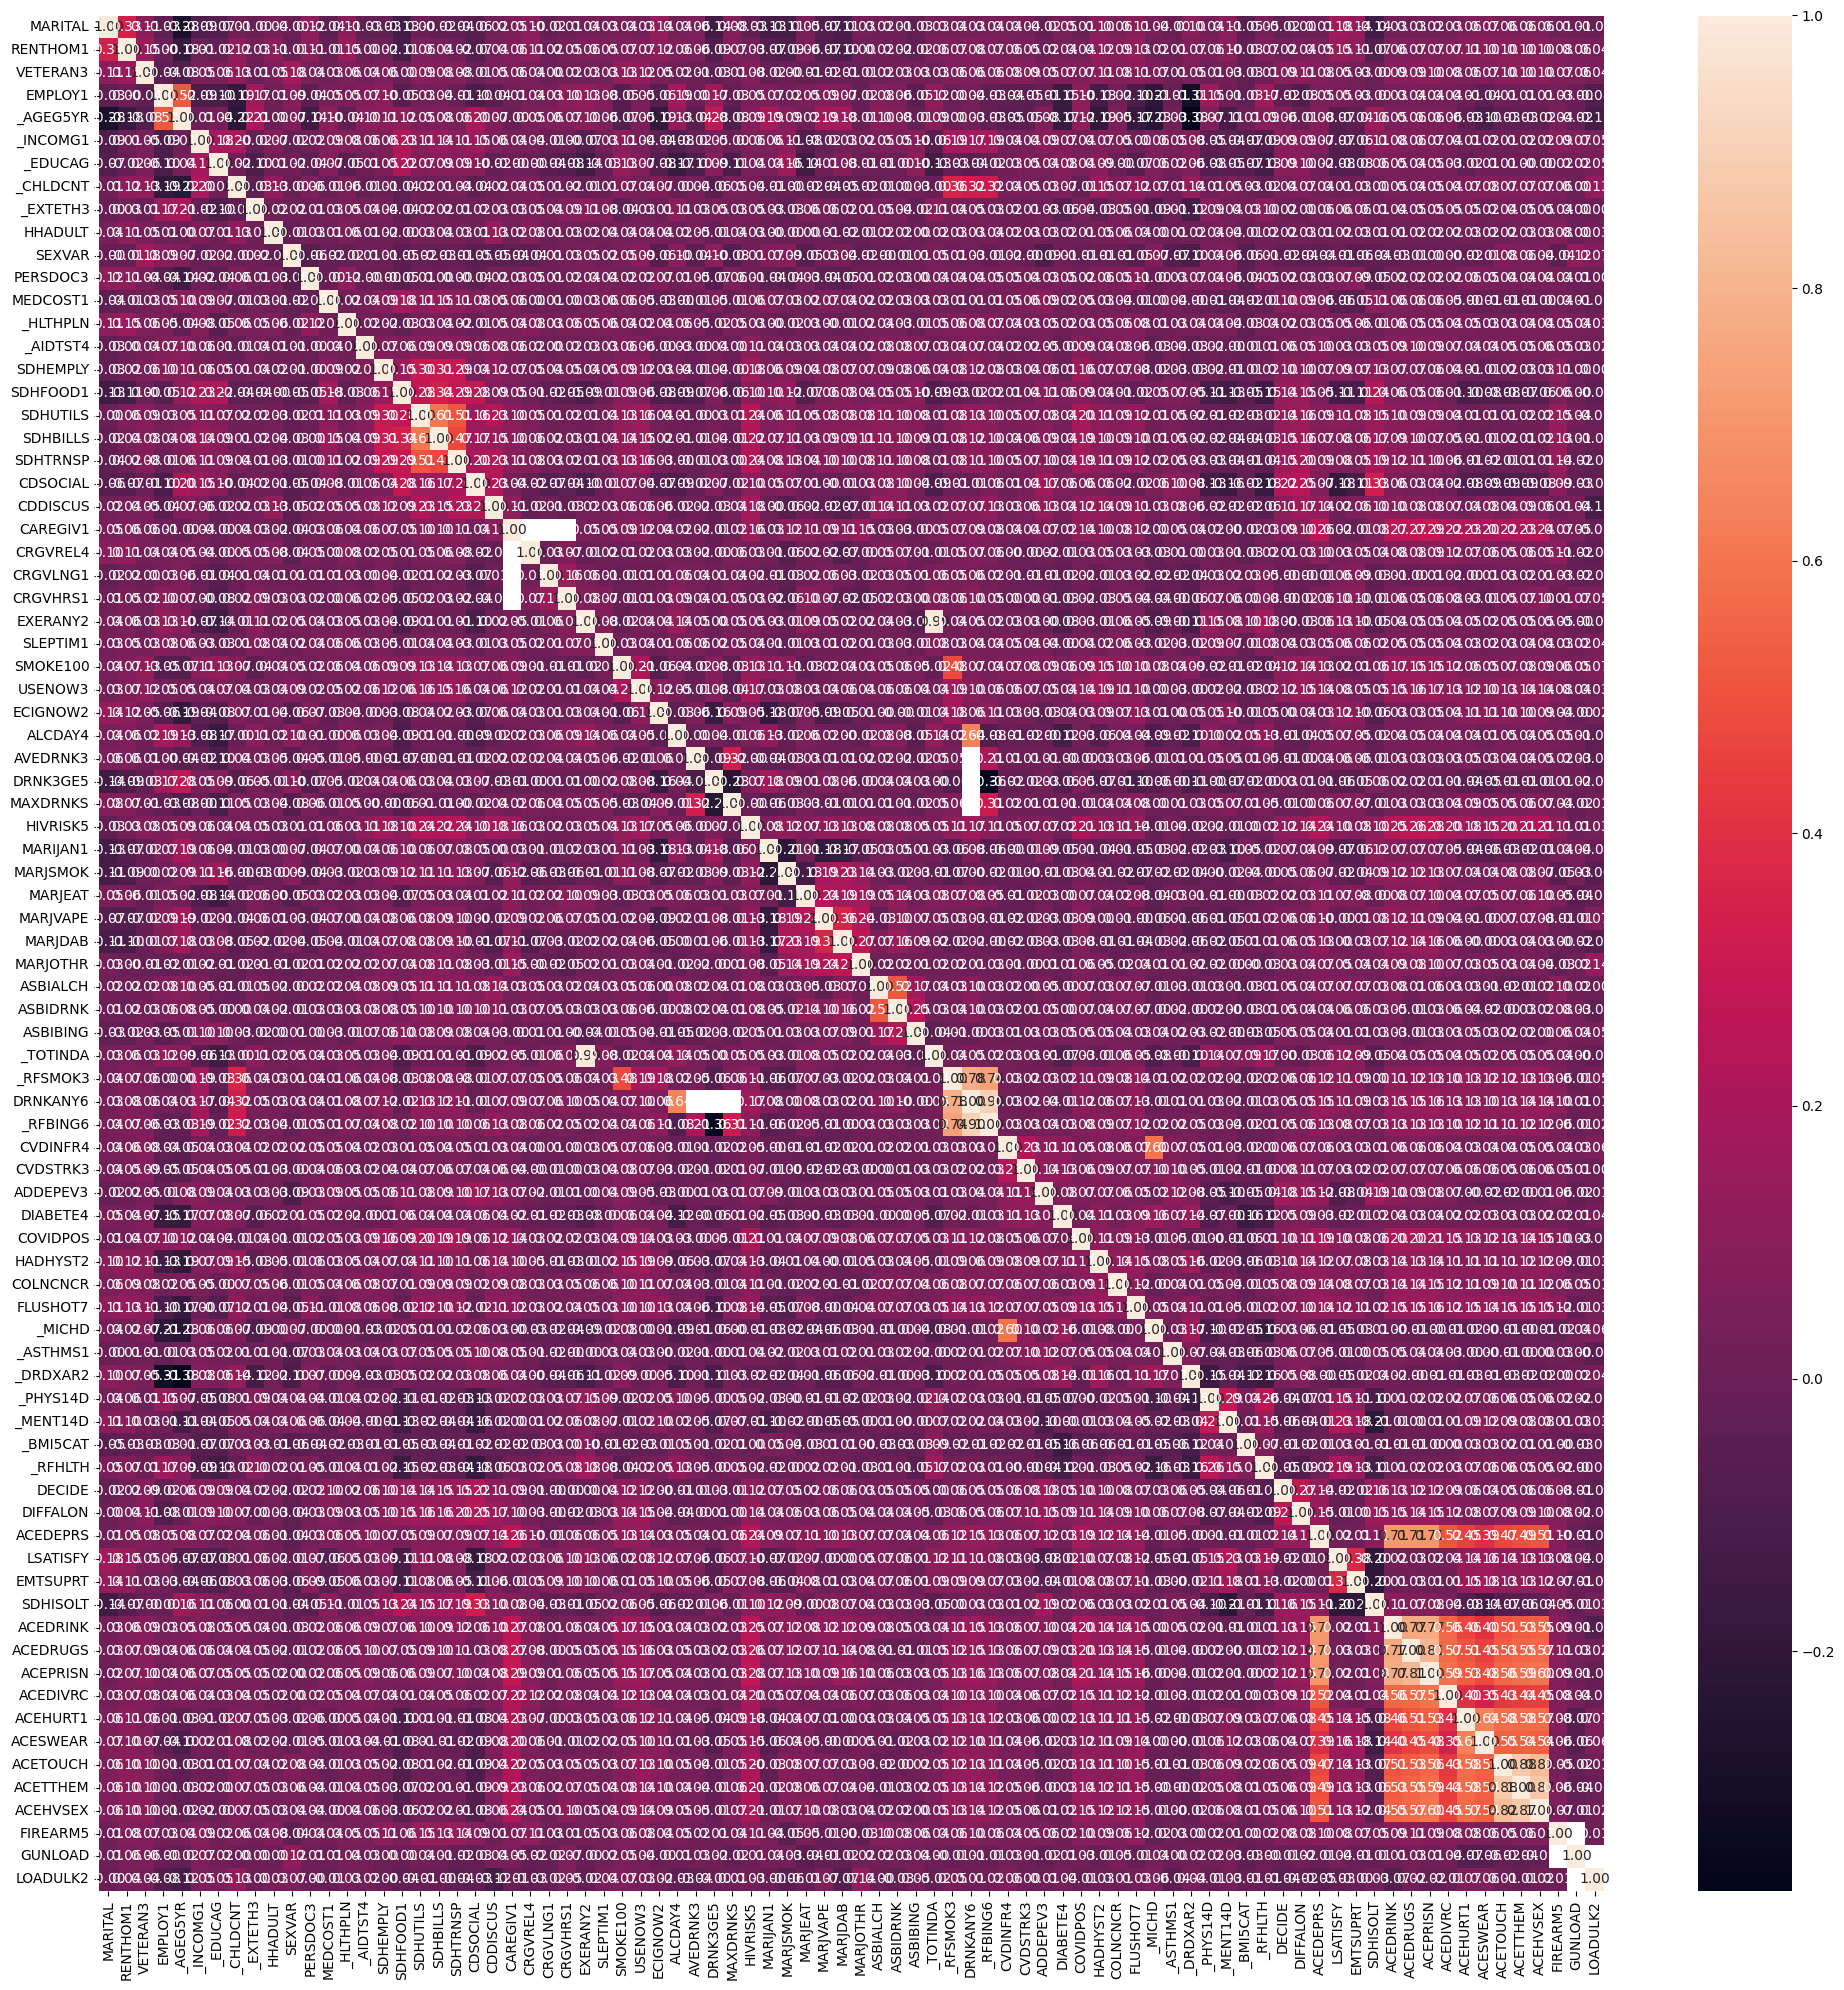

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (20,20))

sns.heatmap(df.corr(), annot = True, fmt = ".2f")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

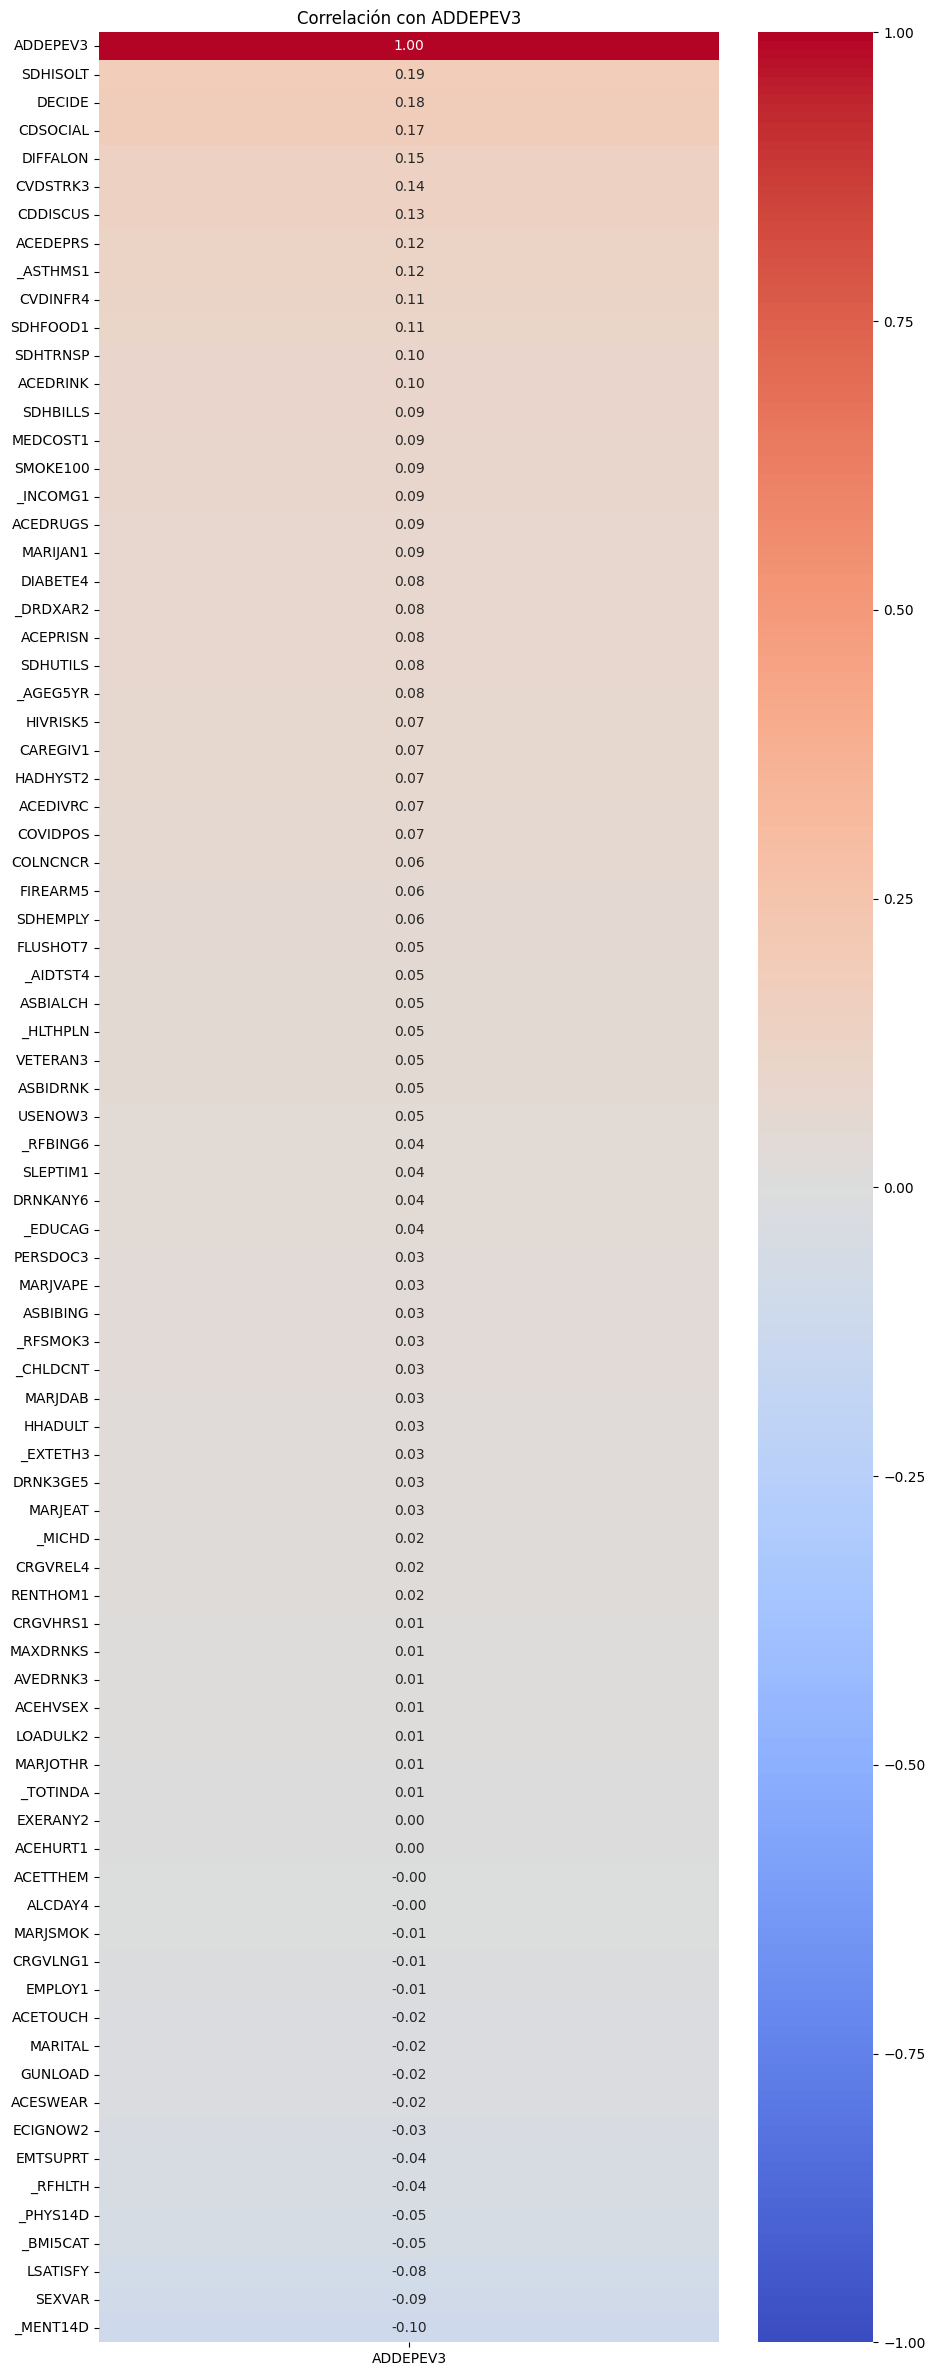

In [6]:
# Seleccionamos solo variables numéricas
numeric_df = df.select_dtypes(include='number')

# Calculamos la matriz de correlación
cor_matrix = numeric_df.corr()

# Extraemos correlación con ADDEPEV3
cor_target = cor_matrix[["ADDEPEV3"]].sort_values(by="ADDEPEV3", ascending=False)

# Hacemos el heatmap
plt.figure(figsize=(10, 30))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con ADDEPEV3")
plt.show()

In [13]:
columnas_a_borrar = []

for i in data.columns:
    porcentaje_nulos = df[i].isnull().sum() / len(df) * 100
    print(f'Columna: {i} - Porcentaje de valores nulos: {porcentaje_nulos:.2f}%')
    if porcentaje_nulos >= 60:
        columnas_a_borrar.append(i)

Columna: MARITAL - Porcentaje de valores nulos: 0.00%
Columna: RENTHOM1 - Porcentaje de valores nulos: 0.00%
Columna: VETERAN3 - Porcentaje de valores nulos: 0.94%
Columna: EMPLOY1 - Porcentaje de valores nulos: 1.39%
Columna: _AGEG5YR - Porcentaje de valores nulos: 0.00%
Columna: _INCOMG1 - Porcentaje de valores nulos: 0.00%
Columna: _EDUCAG - Porcentaje de valores nulos: 0.00%
Columna: _CHLDCNT - Porcentaje de valores nulos: 0.00%
Columna: _EXTETH3 - Porcentaje de valores nulos: 0.00%
Columna: HHADULT - Porcentaje de valores nulos: 21.58%
Columna: SEXVAR - Porcentaje de valores nulos: 0.00%
Columna: PERSDOC3 - Porcentaje de valores nulos: 0.00%
Columna: MEDCOST1 - Porcentaje de valores nulos: 0.00%
Columna: _HLTHPLN - Porcentaje de valores nulos: 0.00%
Columna: _AIDTST4 - Porcentaje de valores nulos: 10.39%
Columna: SDHEMPLY - Porcentaje de valores nulos: 43.05%
Columna: SDHFOOD1 - Porcentaje de valores nulos: 43.20%
Columna: SDHUTILS - Porcentaje de valores nulos: 43.32%
Columna: SD

In [14]:
columnas_a_borrar

['CDSOCIAL',
 'CDDISCUS',
 'CAREGIV1',
 'CRGVREL4',
 'CRGVLNG1',
 'CRGVHRS1',
 'MARIJAN1',
 'MARJSMOK',
 'MARJEAT',
 'MARJVAPE',
 'MARJDAB',
 'MARJOTHR',
 'ASBIALCH',
 'ASBIDRNK',
 'ASBIBING',
 'ACEDEPRS',
 'ACEDRINK',
 'ACEDRUGS',
 'ACEPRISN',
 'ACEDIVRC',
 'ACEHURT1',
 'ACESWEAR',
 'ACETOUCH',
 'ACETTHEM',
 'ACEHVSEX',
 'FIREARM5',
 'GUNLOAD',
 'LOADULK2']

In [16]:
df_drop = df.drop(columnas_a_borrar,axis=1)
df_drop.shape

(445132, 54)

In [25]:
columnas_con_nulos = []

for i in df_drop.columns:
    porcentaje_nulos = df_drop[i].isnull().sum() / len(df) * 100
    print(f'Columna: {i} - Porcentaje de valores nulos: {porcentaje_nulos:.2f}%')
    if porcentaje_nulos >= 40:
        columnas_con_nulos.append(i)

Columna: MARITAL - Porcentaje de valores nulos: 0.00%
Columna: RENTHOM1 - Porcentaje de valores nulos: 0.00%
Columna: VETERAN3 - Porcentaje de valores nulos: 0.94%
Columna: EMPLOY1 - Porcentaje de valores nulos: 1.39%
Columna: _AGEG5YR - Porcentaje de valores nulos: 0.00%
Columna: _INCOMG1 - Porcentaje de valores nulos: 0.00%
Columna: _EDUCAG - Porcentaje de valores nulos: 0.00%
Columna: _CHLDCNT - Porcentaje de valores nulos: 0.00%
Columna: _EXTETH3 - Porcentaje de valores nulos: 0.00%
Columna: HHADULT - Porcentaje de valores nulos: 21.58%
Columna: SEXVAR - Porcentaje de valores nulos: 0.00%
Columna: PERSDOC3 - Porcentaje de valores nulos: 0.00%
Columna: MEDCOST1 - Porcentaje de valores nulos: 0.00%
Columna: _HLTHPLN - Porcentaje de valores nulos: 0.00%
Columna: _AIDTST4 - Porcentaje de valores nulos: 10.39%
Columna: SDHEMPLY - Porcentaje de valores nulos: 43.05%
Columna: SDHFOOD1 - Porcentaje de valores nulos: 43.20%
Columna: SDHUTILS - Porcentaje de valores nulos: 43.32%
Columna: SD

In [26]:
print(columnas_con_nulos)

['SDHEMPLY', 'SDHFOOD1', 'SDHUTILS', 'SDHBILLS', 'SDHTRNSP', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'HADHYST2', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT']


In [ ]:
columns_corr = columnas_con_nulos.append

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[columnas_con_nulos] = imputer.fit_transform(df[features])


In [12]:
health_risk_cols = df[["CVDSTRK3", "DIABETE4", "COLNCNCR", "_MICHD", "_ASTHMS1", "_DRDXAR2","ADDEPEV3"]]
health_risk_cols

,CVDSTRK3,DIABETE4,COLNCNCR,_MICHD,_ASTHMS1,_DRDXAR2,ADDEPEV3
0,2.0,1.0,2.0,2.0,3.0,2.0,2.0
1,2.0,3.0,2.0,2.0,3.0,2.0,2.0
2,2.0,3.0,2.0,2.0,3.0,2.0,2.0
3,2.0,3.0,2.0,2.0,1.0,1.0,2.0
4,2.0,3.0,NaN,2.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...
445127,2.0,3.0,NaN,2.0,1.0,2.0,1.0
445128,2.0,3.0,2.0,2.0,3.0,2.0,2.0
445129,2.0,3.0,2.0,2.0,3.0,2.0,2.0
445130,2.0,3.0,2.0,1.0,2.0,2.0,2.0


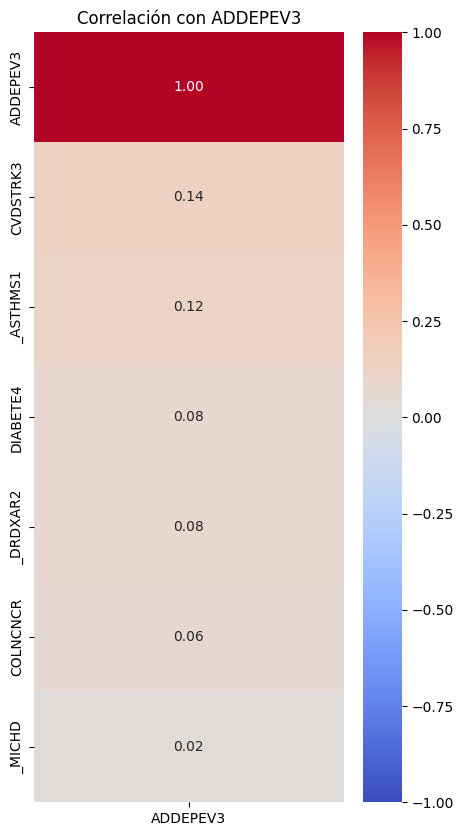

In [14]:


# Seleccionamos solo variables numéricas
numeric_df = health_risk_cols.select_dtypes(include='number')

# Calculamos la matriz de correlación
cor_matrix = numeric_df.corr()

# Extraemos correlación con ADDEPEV3
cor_target = cor_matrix[["ADDEPEV3"]].sort_values(by="ADDEPEV3", ascending=False)

# Hacemos el heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con ADDEPEV3")
plt.show()

In [15]:
health_risk_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CVDSTRK3  445130 non-null  float64
 1   DIABETE4  445129 non-null  float64
 2   COLNCNCR  291086 non-null  float64
 3   _MICHD    440111 non-null  float64
 4   _ASTHMS1  445132 non-null  float64
 5   _DRDXAR2  442499 non-null  float64
 6   ADDEPEV3  445125 non-null  float64
dtypes: float64(7)
memory usage: 23.8 MB


In [17]:
trauma_exposure_cols = df[["ADDEPEV3","ACEDEPRS", "EMTSUPRT", "SDHISOLT", "ACEDRINK", "ACEDRUGS", "ACEPRISN","ACEDIVRC", "ACEHURT1", "ACESWEAR", "ACETOUCH", "ACETTHEM", "ACEHVSEX"]]
trauma_exposure_cols

,ADDEPEV3,ACEDEPRS,EMTSUPRT,SDHISOLT,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX
0,2.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445128,2.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445129,2.0,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445130,2.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


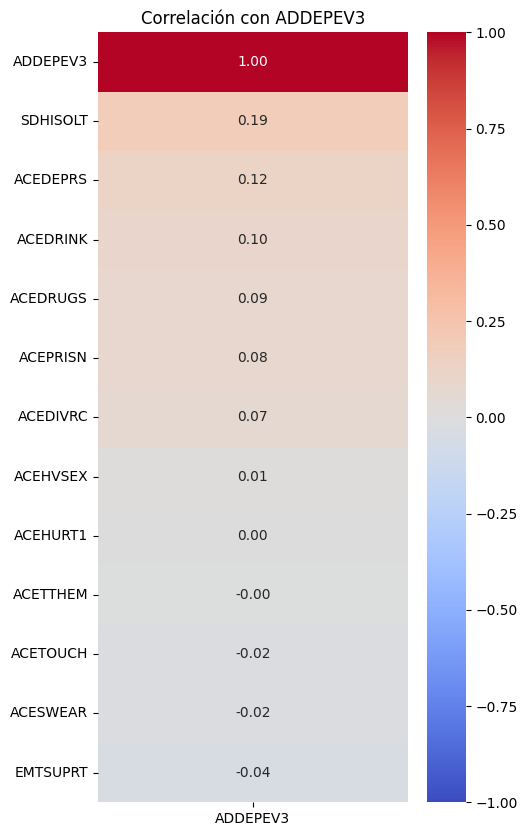

In [18]:
# Seleccionamos solo variables numéricas
numeric_df = trauma_exposure_cols.select_dtypes(include='number')

# Calculamos la matriz de correlación
cor_matrix = numeric_df.corr()

# Extraemos correlación con ADDEPEV3
cor_target = cor_matrix[["ADDEPEV3"]].sort_values(by="ADDEPEV3", ascending=False)

# Hacemos el heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con ADDEPEV3")
plt.show()

In [19]:
trauma_exposure_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ADDEPEV3  445125 non-null  float64
 1   ACEDEPRS  48286 non-null   float64
 2   EMTSUPRT  254141 non-null  float64
 3   SDHISOLT  253790 non-null  float64
 4   ACEDRINK  48231 non-null   float64
 5   ACEDRUGS  48220 non-null   float64
 6   ACEPRISN  48194 non-null   float64
 7   ACEDIVRC  48172 non-null   float64
 8   ACEHURT1  48077 non-null   float64
 9   ACESWEAR  48029 non-null   float64
 10  ACETOUCH  47972 non-null   float64
 11  ACETTHEM  47936 non-null   float64
 12  ACEHVSEX  47876 non-null   float64
dtypes: float64(13)
memory usage: 44.1 MB


In [ ]:
(df['SDHISOLT'].isnull().sum() / len(df))

np.float64(42.98545150651941)